We are provided with patient level data of a hospital. We've to tease out meaningful and actionable insights for the hospital to function more efficiently, to influence diagnostic and treatment processes, to estimate the infection spread and health system demand. For example, identifying the variables that are significant in predicting the reason for hospitalization, how different variables affect hospitalization charges.

Concepts Used:

Graphical and Non-Graphical Analysis, 2-sample t-test, ANOVA, Chi-square


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest # For proportion z test
from statsmodels.stats.anova import anova_lm # For n-way anova
from statsmodels.formula.api import ols # For n-way anova
from scipy.stats import chi2_contingency # For Chi-sq
from scipy import stats

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [ ]:
df=pd.read_csv("file.csv")
df.head()

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()/len(df)*100

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

In [ ]:
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
df.select_dtypes(np.number).columns

Index(['age', 'viral load', 'severity level', 'hospitalization charges'], dtype='object')

There are no Null values in any of the columns.

Target variable is "hospitalization charges'.

Categorical variables - sex,smoker,region

Continous variables - age,viral load,severity level,hospitalization charges

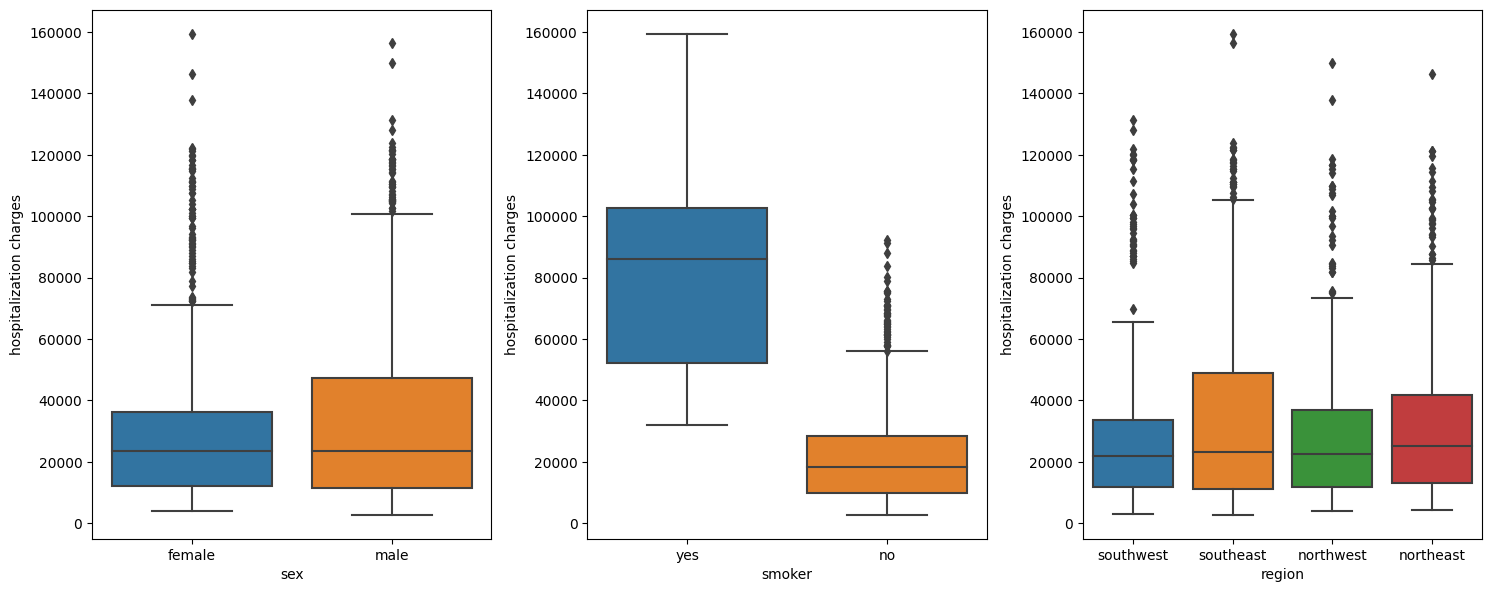

In [ ]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
  plt.subplot(1,3,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='hospitalization charges',data=df)
  plt.tight_layout(pad=1)


From the above graphs, its clear that smokers spend more on hospitalization that non smokers. From the graph,  hospitalization charges seems to be independent of region and gender. However we need to do significance testing to prove this.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [ ]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.0000,5.00
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


In [ ]:
## OUtlier treatment
for i,j in enumerate(list(df.select_dtypes(np.number).columns)):
  q1=df[j].quantile(0.25)
  q3=df[j].quantile(0.75)
  iqr=q3-q1
  df=df[(df[j]>=q1-1.5*iqr) & (df[j]<=q3+1.5*iqr)]

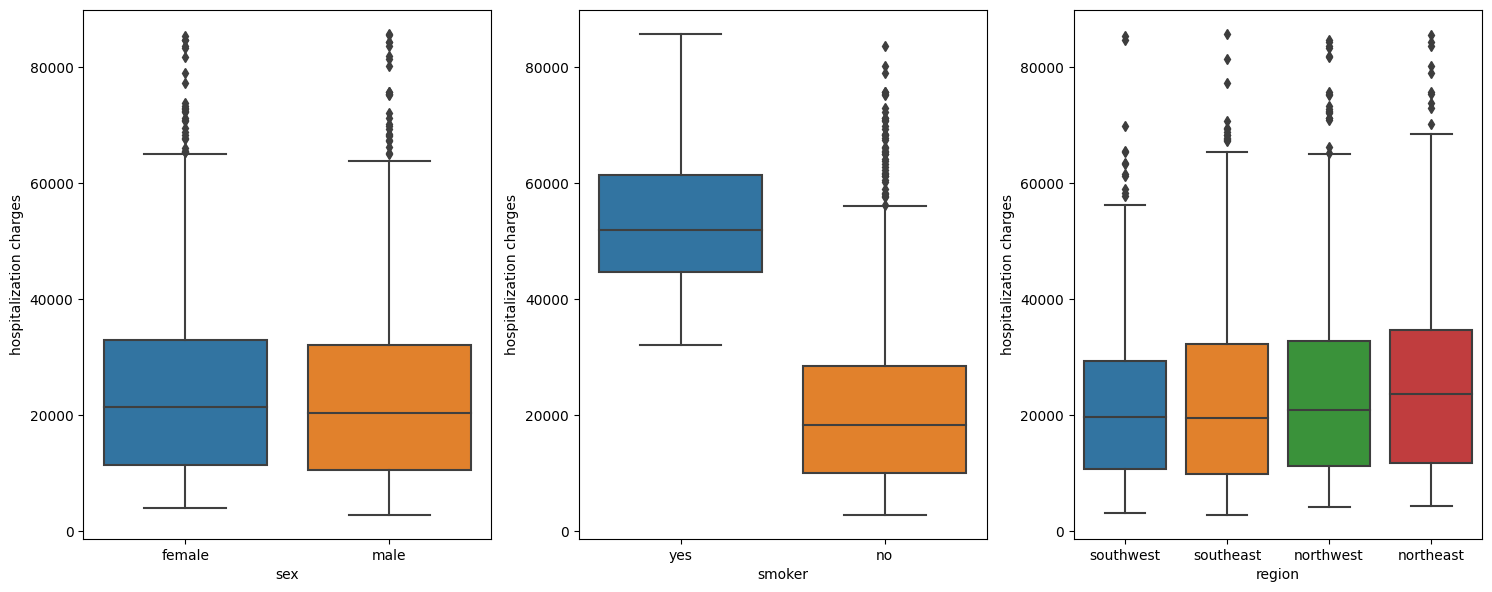

In [ ]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
  plt.subplot(1,3,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='hospitalization charges',data=df)
  plt.tight_layout(pad=1)

Median of boxplots got reduced after outlier removal. Repeating for all continous vars.

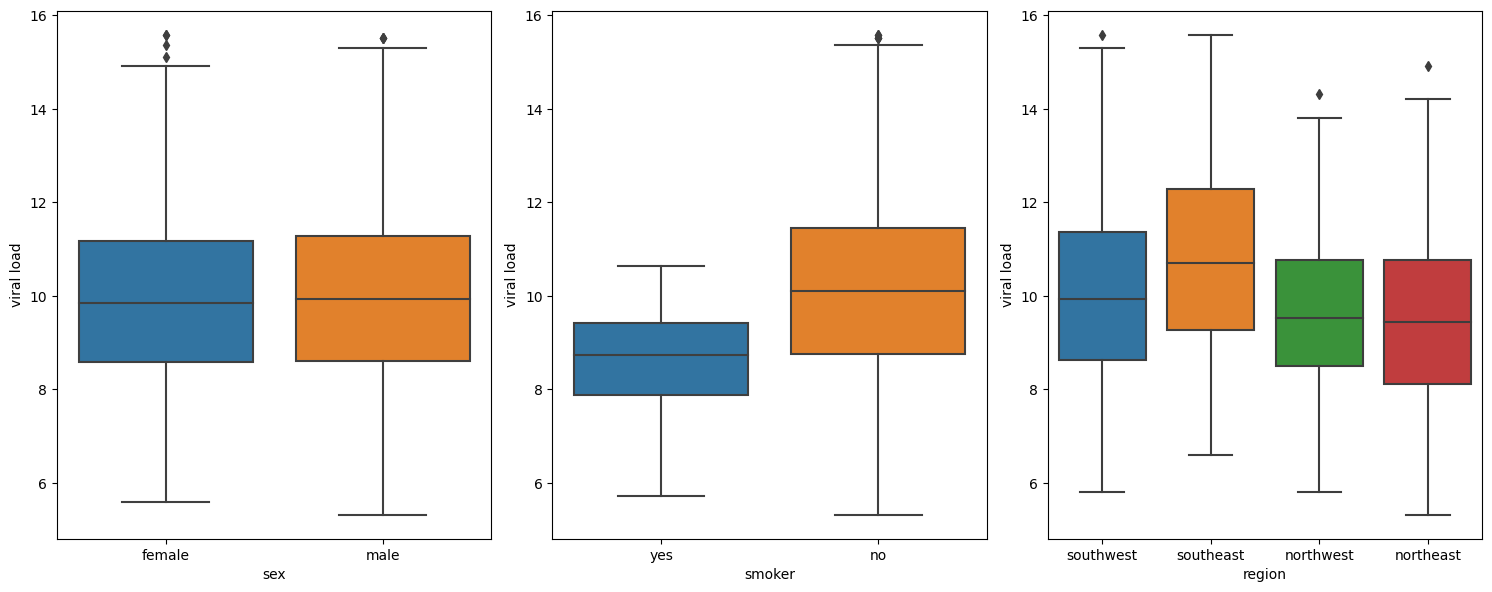

In [ ]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
  plt.subplot(1,3,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='viral load',data=df)
  plt.tight_layout(pad=1)

Viral load in south east area seems to be higher thatn other areas. However difference is too low so that we need to do hypothesis testing to validate it.

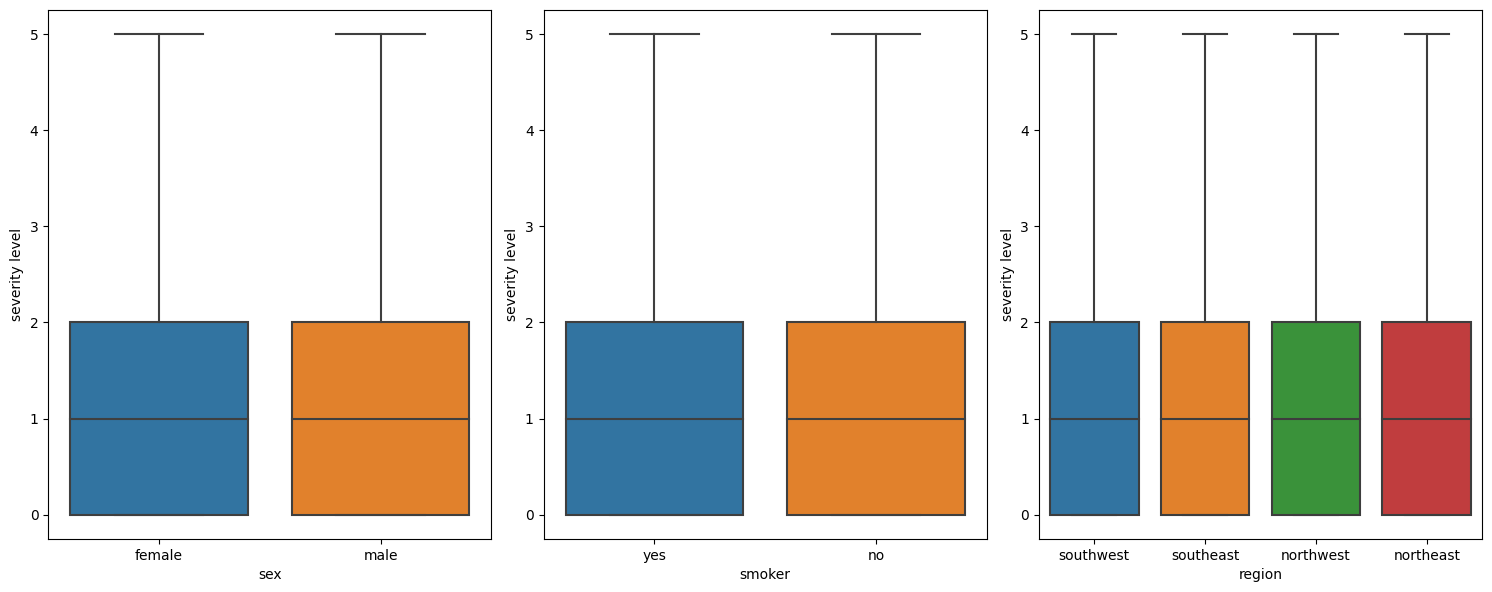

In [ ]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
  plt.subplot(1,3,i+1)
  plt.subplots_adjust(hspace=0.8)
  sns.boxplot(x=j,y='severity level',data=df)
  plt.tight_layout(pad=1)

Severity level seems to be independent of gender,smoker and region. We need to do hypothesis testing to validate it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1191 non-null   int64  
 1   sex                      1191 non-null   object 
 2   smoker                   1191 non-null   object 
 3   region                   1191 non-null   object 
 4   viral load               1191 non-null   float64
 5   severity level           1191 non-null   int64  
 6   hospitalization charges  1191 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 74.4+ KB


<ipython-input-67-5b0612c2fdee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


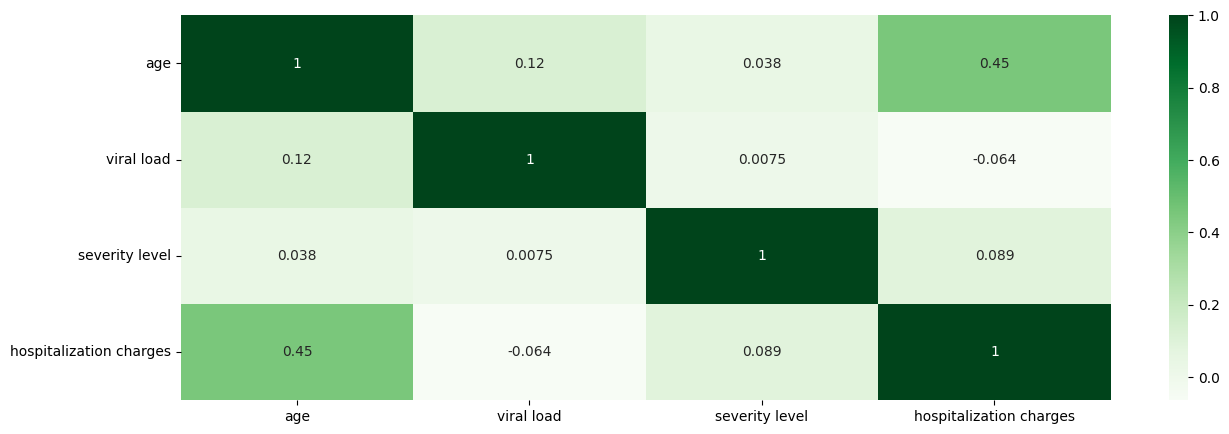

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

Age has highest impact on hospitalization charges

<Axes: xlabel='age', ylabel='hospitalization charges'>

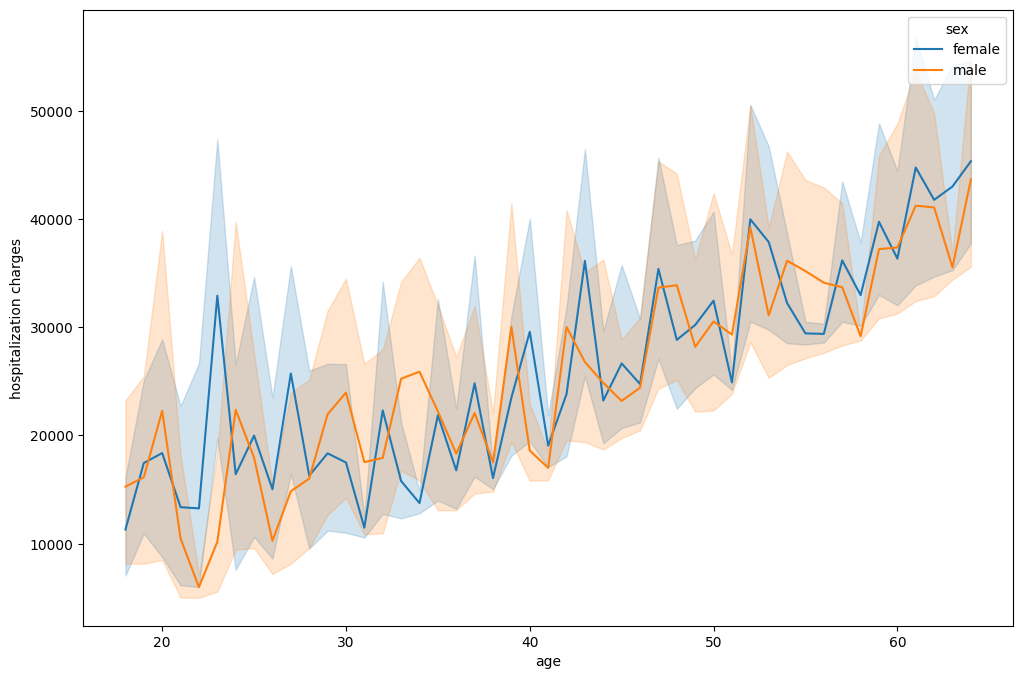

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='hospitalization charges',data=df,hue='sex')

As age increases hospitalization charge increases. For every age, female hospitalization charge is more compared to men.

In [ ]:
df['age_bins']=pd.cut(x=df['age'],bins=[0,18,28,38,48,58,68,100],labels=['0-18','18-28','28-38','38-48','48-58','58-68','68-100'])
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-28
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-28
3,33,male,no,northwest,7.57,0,54961,28-38
4,32,male,no,northwest,9.63,0,9667,28-38


<Axes: xlabel='age_bins', ylabel='hospitalization charges'>

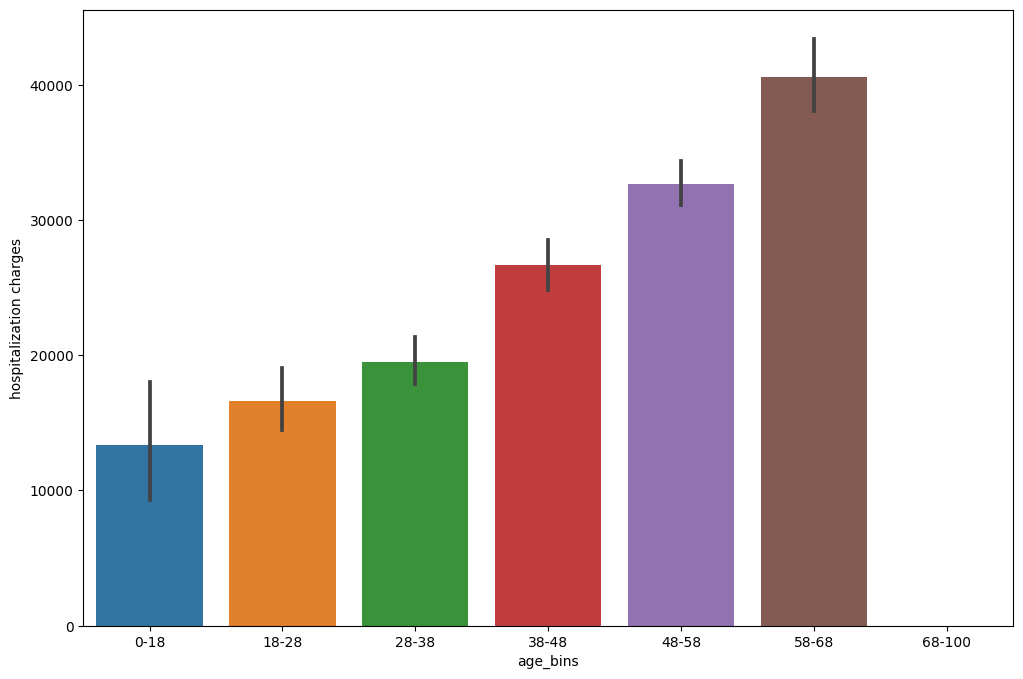

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='age_bins',y='hospitalization charges',data=df)

In [ ]:
df.groupby(['region','sex','smoker'])['hospitalization charges'].mean().unstack()

smoker                      no           yes
region    sex                               
northeast female  24105.053435  48756.263158
          male    21660.096000  56480.500000
northwest female  21967.518519  58942.350000
          male    20801.734848  56219.444444
southeast female  20590.739130  56240.470588
          male    19123.868217  53855.058824
southwest female  19585.122302  54129.909091
          male    19447.293651  50628.571429

Insights :

As age increases charges increases.

Smokers spend more on hospitalization charges compared to non smokers.

Females spend more compared to males


### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

Since population variance is unknown we can perform ttest. Also we need to prove charges for smoker> charges for non smoker. So one tailed t-test.

Step1 : Define Null hypothesis and Alternate hypothesis

H0:mu1<=mu2 Average charges of smokers is less than or equal to non smokers

H1:mu1>mu2 Average charges of smokers is greater than nonsmokers

Step2: Decide significance level. If P value < alpha, reject null hypothesis.

alpha=0.05 (5% industrial standard)

The > sign in alternate hypothesis indicate test is right tailed, that is all z values that will cause us to reject null hypothesis are in just one tail to the right of the sampling distribution curve.

In [ ]:
df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1055.0,20907.971564,14563.067125,2805.0,9962.5,18313.0,28387.5,83680.0
yes,136.0,54578.154412,13360.849267,32074.0,44663.5,51899.5,61421.5,85758.0


Variance of smokers and non smokers are significantly different. Now we need to create two samples of data, one for smokers and other for non smokers of equal size. So we take min of both dataset sizes-136

Power of the test increases if sample size is equal. Higher the power means higher the ability of test to actually identify the effect if there's any.

In [ ]:
smoker=df[df['smoker']=='yes']['hospitalization charges'].sample(136)
nonsmoker=df[df['smoker']=='no']['hospitalization charges'].sample(136)

In [ ]:
alpha=0.05
t_statistic,p_value=stats.ttest_ind(smoker,nonsmoker,equal_var=False)
#equal_var=False => welch's test => doesn't assume variance to be equal
p_value_onetail=p_value/2     ## or give alternative=True as param to ttest_ind. Then no need to do division.
print("Test statistic={},\nP value={},\nOne tail P value={}".format(t_statistic,p_value,p_value_onetail))

Test statistic=17.90400725826521,
P value=2.9286060617235683e-47,
One tail P value=1.4643030308617841e-47


P value < alpha. SO we reject null hypothesis. Alternative hypothesis is true. That means hospitalization charges for smokers are high compared to non smokers.

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

In [ ]:
df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,610.0,9.966541,1.96940,5.60,8.585,9.855,11.1725,15.58
male,581.0,10.030947,1.94495,5.32,8.600,9.940,11.2900,15.51


In [ ]:
male=df[df['sex']=="male"]['viral load'].sample(581)
female=df[df['sex']=="female"]['viral load'].sample(581)

H0: mu1=mu2 No difference in viral load in males and females

H1: mu1!=mu2 Viral load in males and females are different.

alpha=0.05

Population standard deviation not known.So t-test.

Not equal to sign in alternate hypothesis says its a two sided test

In [ ]:
alpha=0.05
t_statistic,p_value=stats.ttest_ind(male,female,alternative='two-sided')
print("Test statistic={},\nP value={}".format(t_statistic,p_value))


Test statistic=0.7628479564174515,
P value=0.44570917541929755


P value > alpha . So we fail to reject null hypothesis.

Viral load in males and females are same.

<ipython-input-78-d9b58976600d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male,color='green',hist=False)
<ipython-input-78-d9b58976600d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female,color='red',hist=False)


<Axes: xlabel='viral load', ylabel='Density'>

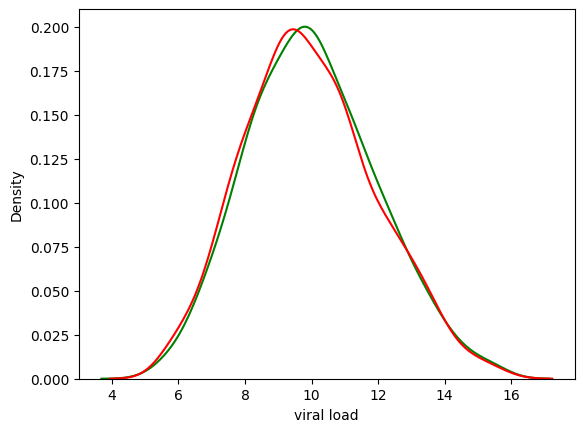

In [ ]:
sns.distplot(male,color='green',hist=False)
sns.distplot(female,color='red',hist=False)

### Is the proportion of smoking significantly different across different regions? (Chi-square)

Since both are categorical we can do Chi-Square test.

H0: Smokers proportion is independent of regions

H1: Smokers proportion is different across different regions

In [ ]:
contigency=pd.crosstab(df.region,df.smoker) ## or df.groupby('region','smoker')['age'].count().unstack()
contigency

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,34
southwest,265,25


<Axes: xlabel='region'>

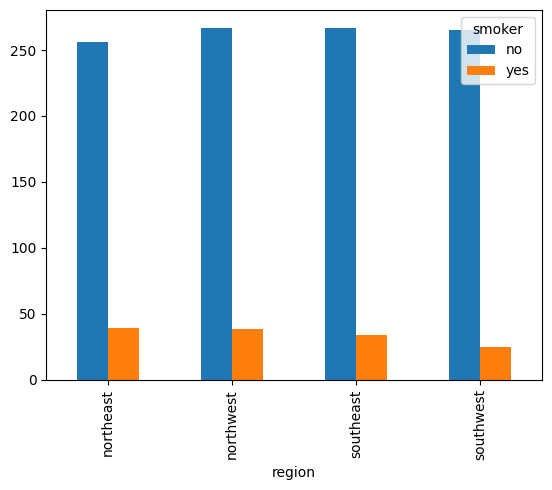

In [ ]:
contigency.plot(kind='bar')

Across all regions non smoking population is higher than smoking population

In [ ]:
# Using the chi2 contigency test
chi2,pval,dof,exp_freq=chi2_contingency(contigency,correction=False)
print("Chi-Square statistic={},\n P value={},\n Degrees of freedom={},\n Expected frequency=\n{}".format(chi2,pval,dof,exp_freq))

Chi-Square statistic=3.5220357595425758,
 P value=0.31791538258247426,
 Degrees of freedom=3,
 Expected frequency=
[[261.31402183  33.68597817]
 [270.17212427  34.82787573]
 [266.62888329  34.37111671]
 [256.88497061  33.11502939]]


P value > alpha. So we failed to reject null hypothesis. That means smoker proportion is independent of regions.

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

Viral load is continous and severity level is categorical. So we will do Anova test.

H0: mu1=mu2=mu3 Mean viral load of women with 0,1 and 2 severity levels are same

H1: Atleast one of the 3 mean viral load is different.

One-way ANOVA - Equality of population through variances of samples

In [ ]:
df[df['sex']=='female'].groupby('severity level')['viral load'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,268.0,9.963209,1.936862,5.76,8.6075,9.695,11.1300,14.92
1,147.0,9.908844,1.918987,5.60,8.6000,9.670,11.1300,15.36
2,106.0,9.945000,2.092305,5.73,8.3450,10.060,11.2025,15.57


For anova test to be reliable, 2 assumptions to meet:

1] Normal distribution

2] Variance is approximately equal.

In [ ]:
df_female_severe=df[df['sex']=='female'].loc[df[df['sex']=='female']['severity level']<=2]
df_female_severe.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-28
5,31,female,no,southeast,8.58,0,9392,28-38
6,46,female,no,southeast,11.15,1,20601,38-48
9,60,female,no,northwest,8.61,0,72308,58-68
11,62,female,yes,southeast,8.76,0,69522,58-68


In [ ]:
df_female_severe['severity level'].value_counts()

0    268
1    147
2    106
Name: severity level, dtype: int64

<Axes: xlabel='severity level', ylabel='viral load'>

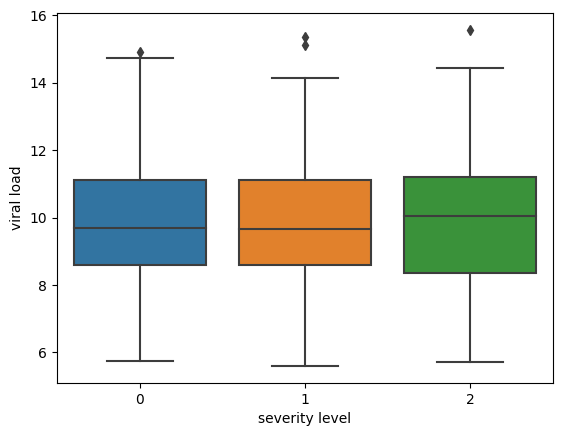

In [ ]:
sns.boxplot(x='severity level',y='viral load',data=df_female_severe)

## Normality assumption check

<ipython-input-86-b00c89b1555a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sev0,color='green',hist=False)
<ipython-input-86-b00c89b1555a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sev1,color='red',hist=False)
<ipython-input-86-b00c89b1555a>:6: UserWarning: 

`distp

<Axes: xlabel='viral load', ylabel='Density'>

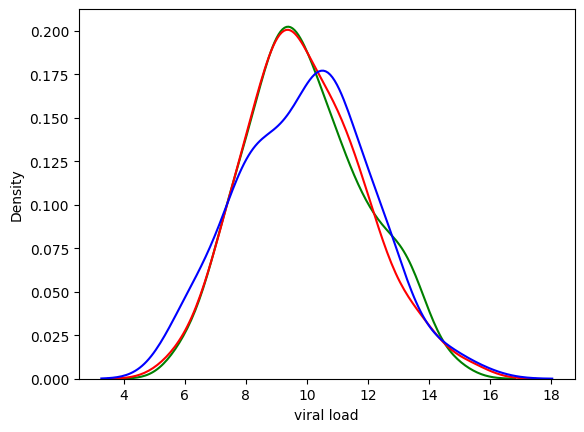

In [ ]:
sev0=df_female_severe[df_female_severe['severity level']==0]['viral load']
sev1=df_female_severe[df_female_severe['severity level']==1]['viral load']
sev2=df_female_severe[df_female_severe['severity level']==2]['viral load']
sns.distplot(sev0,color='green',hist=False)
sns.distplot(sev1,color='red',hist=False)
sns.distplot(sev2,color='blue',hist=False)

Shapiro-Wilk's test

H0: Viral load follows normal distribution

H1: Viral load doesn't follow normal distribution

In [ ]:
from scipy.stats import shapiro
w,p_value=shapiro(df_female_severe['viral load'])
print("P value is ",p_value)

P value is  0.0068216221407055855


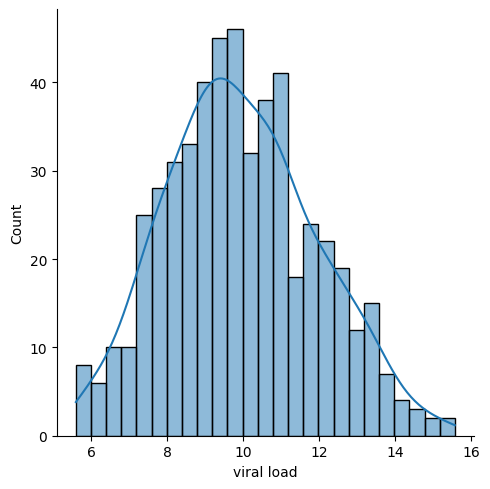

In [ ]:
sns.displot(df_female_severe['viral load'],bins=25,kde=True)

This looks normal. We can do log transform on the data and try Shapiro test again.

In [ ]:
w,p_value=shapiro(np.log(df_female_severe['viral load']))
print("P value is ",p_value)

P value is  0.009918625466525555


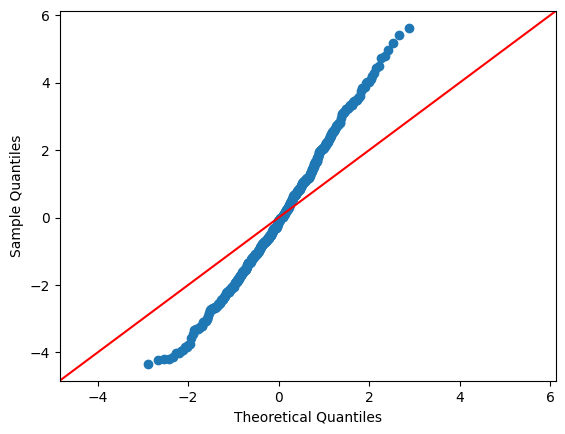

In [ ]:
## QQ plot check
import statsmodels.api as sm
df_std=(df_female_severe['viral load']-df_female_severe['viral load'].mean())
sm.qqplot(df_std,line='45')
plt.show()

Homogenity of Variance assumption check :    

Levene's test

H0: All the viral load variances are equal

H1: At least one variance is different from the test



In [ ]:
from scipy.stats import levene
statistic,p_value=levene(df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106),
                         df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106),
                         df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106)
                         )
print("p value is ",p_value)

p value is  0.5314417835496228


P value > 0.05. SO we fail to reject null hypothesis. That means variance is almost same.

In [ ]:
## Performing Anova
from scipy.stats import f_oneway
test_stat,p_value=f_oneway(df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106),
                         df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106),
                         df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106)
                         )
print("P value is ",p_value)

P value is  0.988514845760692


P value > 0.05. So we failed to reject null hypothesis. That means mean viral load of women with 0,1 and 2 severity levels are same. Looks like viral load doesn't have impact on severity level.

# Recommendations

Charge higher premium to smokers and old aged customers.

Since viral load is same in males and females and also viral load doesn't determine severity, see if any pre medical conditions determine the severity. In that case charge higher premium based on pre medical conditions.
